AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [6]:
import pandas as pd


filename = 'titanic.csv'


titanic_data = pd.read_csv(filename)


df = pd.DataFrame(titanic_data)


print("前10行数据：")
print(df.head(10))


print("\n最后20行数据：")
print(df.tail(20))

print("\n数据集信息：")
print(df.info())


print("\n数据集描述：")
print(df.describe())



前10行数据：
   PassengerId Survived  Pclass  \
0            1        0       3   
1            2        1       1   
2            3        1       3   
3            4        1       1   
4            5        0       3   
5            6        0       3   
6            7        0       1   
7            8        0       3   
8            9        1       3   
9           10        1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0 

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


number of missing values：
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


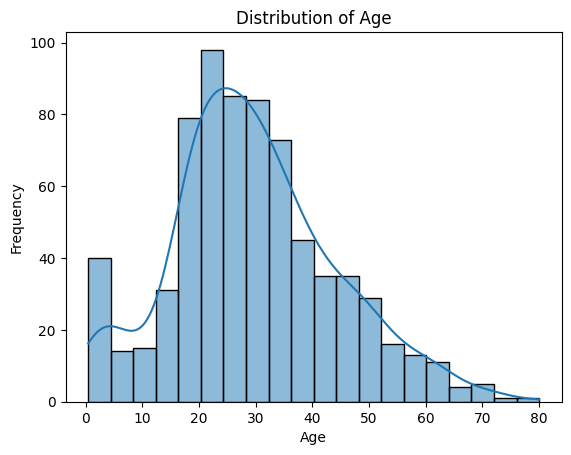

Value distribution of the 'Embarked' column：
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
There are incorrect data in the 'Survived' column and it needs to be processed
The data type of the 'Fare' column is incorrect and needs to be converted


C:\Users\admin\AppData\Local\Temp\ipykernel_12476\3122927143.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(median_age, inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_12476\3122927143.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = pd.read_csv('titanic.csv')

missing_values = titanic.isnull().sum()
print("number of missing values：")
print(missing_values)

sns.histplot(titanic['Age'].dropna(), bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
median_age = titanic['Age'].median()
titanic['Age'].fillna(median_age, inplace=True)

titanic['Cabin'].fillna('Unknown', inplace=True)

embarked_counts = titanic['Embarked'].value_counts()
print("Value distribution of the 'Embarked' column：")
print(embarked_counts)

titanic['Embarked'].fillna('S', inplace=True)

survived_values = titanic['Survived'].unique()
if set(survived_values) <= {0, 1}:
    print("The data in the 'Survived' column is correct")
else:
    print("There are incorrect data in the 'Survived' column and it needs to be processed")

fare_type = titanic['Fare'].dtype
if fare_type == 'float64' or fare_type == 'int64':
    print("The data type of the 'Fare' column is correct")
else:
    print("The data type of the 'Fare' column is incorrect and needs to be converted")
    titanic['Fare'] = pd.to_numeric(titanic['Fare'], errors='coerce')

AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('titanic.csv')

data['Fare'] = data['Fare'].replace('[^0-9.]', '', regex=True)

data['Fare'] = data['Fare'].astype(float)

avg_fare_by_pclass = data.groupby('Pclass')['Fare'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(avg_fare_by_pclass['Pclass'].astype(str), avg_fare_by_pclass['Fare'])  
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.title('Average Fare by Pclass')
plt.show()

data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  

avg_fare_by_sex = data.groupby('Sex')['Fare'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(avg_fare_by_sex['Sex'], avg_fare_by_sex['Fare'])  
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.title('Average Fare by Sex')
plt.show()

AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

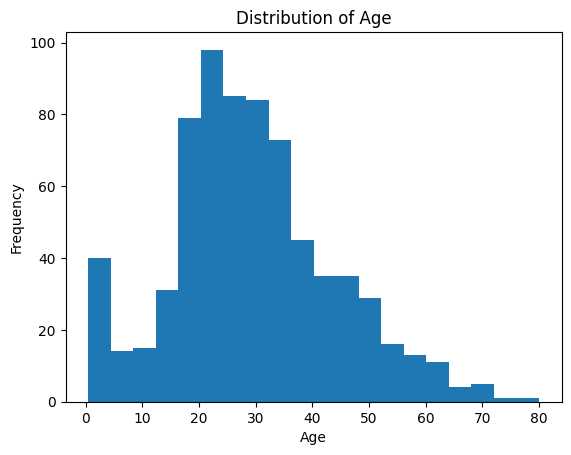

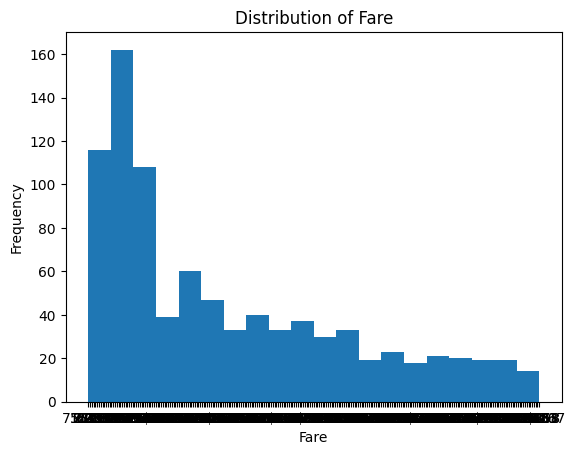

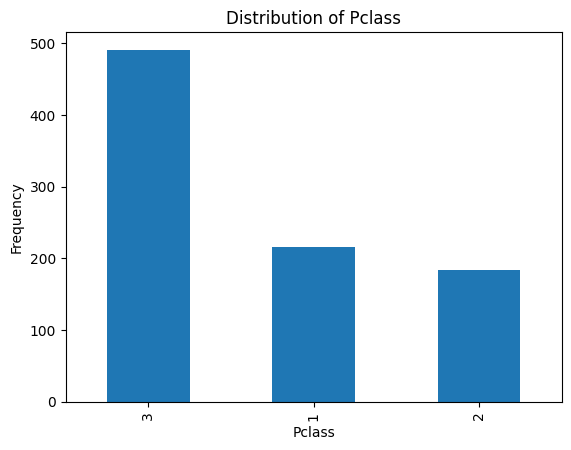

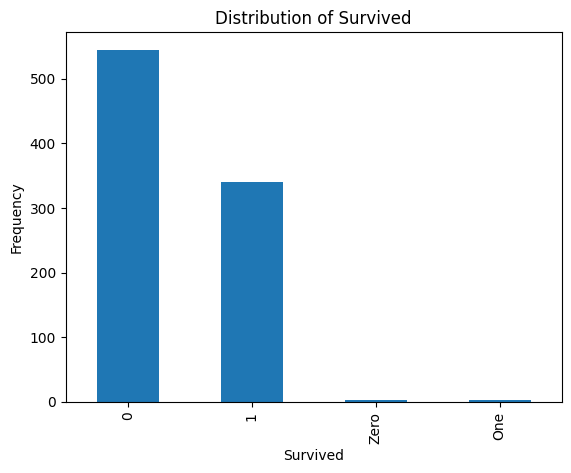

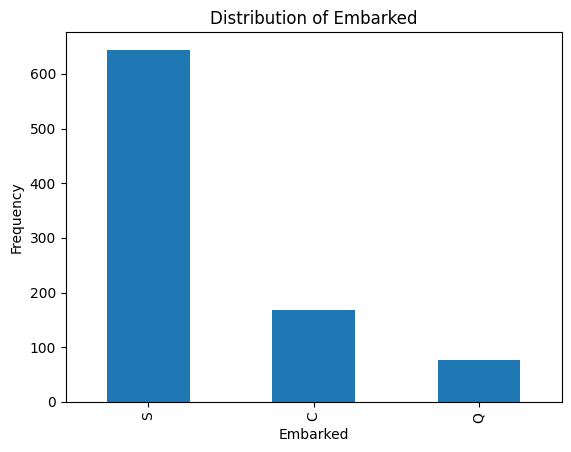

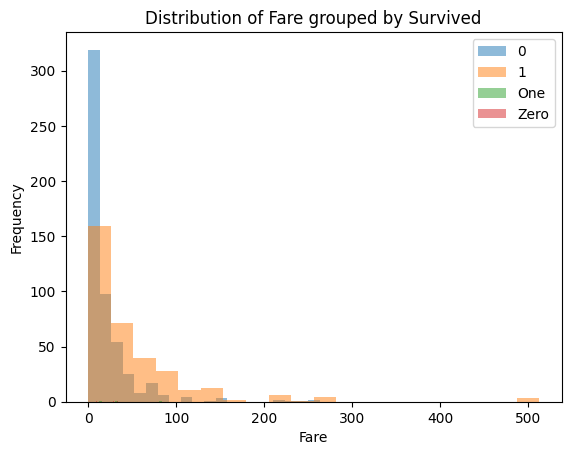

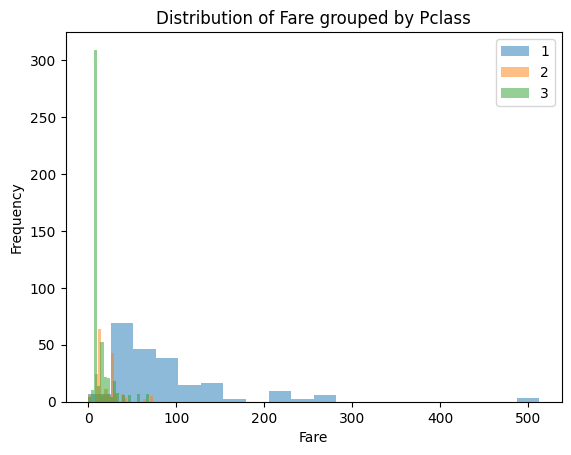

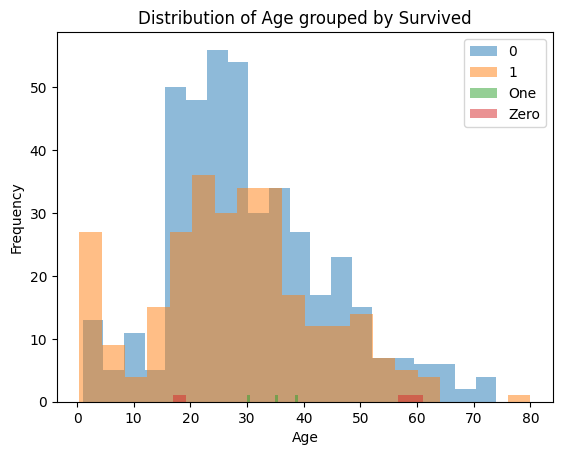

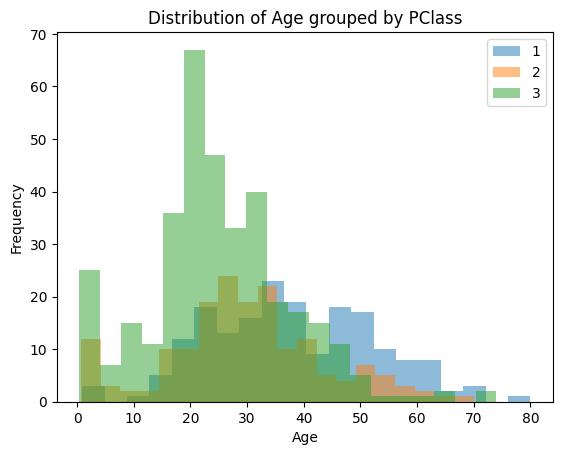

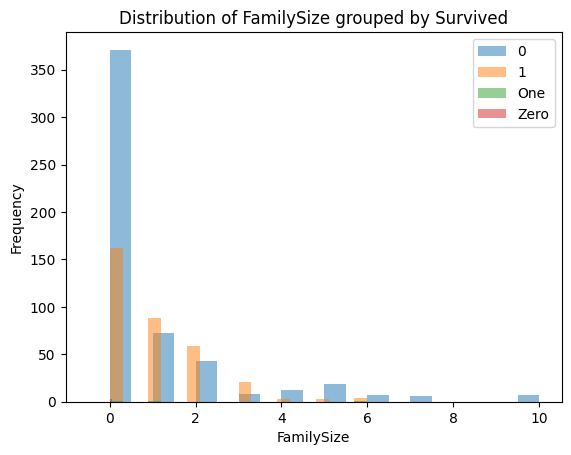

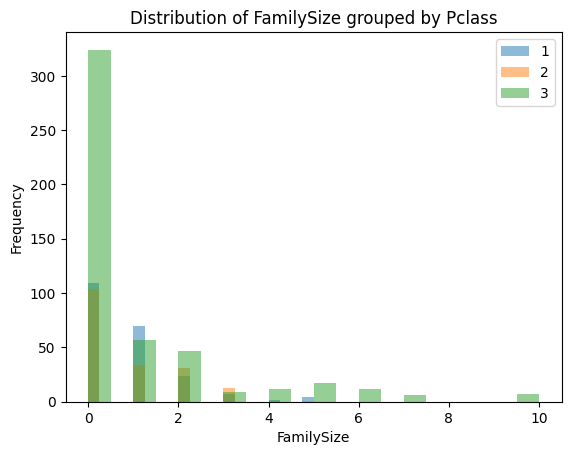

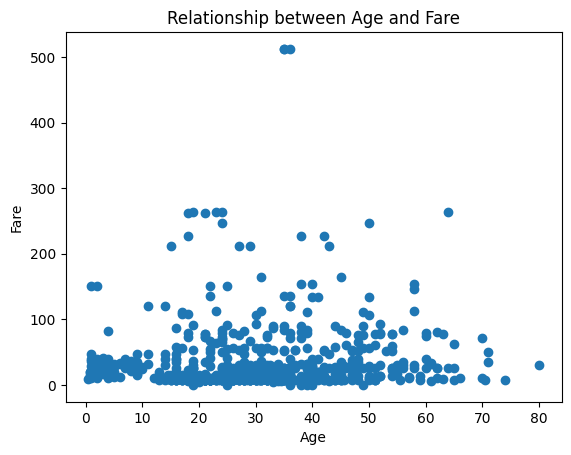

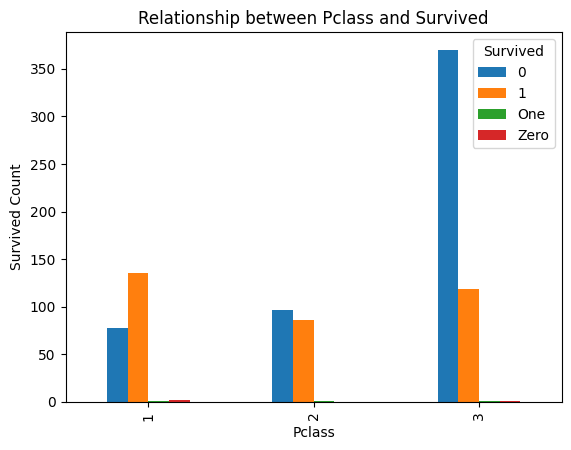

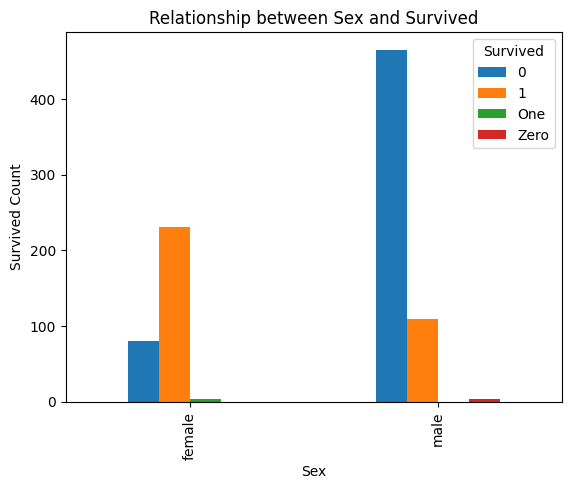

In [8]:

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('titanic.csv')

plt.hist(data['Age'].dropna(), bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

plt.hist(data['Fare'].dropna(), bins=20)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare')
plt.show()

data['Pclass'].value_counts().plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.title('Distribution of Pclass')
plt.show()

data['Survived'].value_counts().plot(kind='bar')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.title('Distribution of Survived')
plt.show()

data['Embarked'].value_counts().plot(kind='bar')
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.title('Distribution of Embarked')
plt.show()

data['Fare'] = pd.to_numeric(data['Fare'], errors='coerce')  
data.groupby('Survived')['Fare'].plot(kind='hist', bins=20, alpha=0.5, legend=True)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare grouped by Survived')
plt.show()

data.groupby('Pclass')['Fare'].plot(kind='hist', bins=20, alpha=0.5, legend=True)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare grouped by Pclass')
plt.show()

data.groupby('Survived')['Age'].plot(kind='hist', bins=20, alpha=0.5, legend=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age grouped by Survived')
plt.show()

data.groupby('Pclass')['Age'].plot(kind='hist', bins=20, alpha=0.5, legend=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age grouped by PClass')
plt.show()

data['FamilySize'] = data['SibSp'] + data['Parch']
data.groupby('Survived')['FamilySize'].plot(kind='hist', bins=20, alpha=0.5, legend=True)
plt.xlabel('FamilySize')
plt.ylabel('Frequency')
plt.title('Distribution of FamilySize grouped by Survived')
plt.show()

data.groupby('Pclass')['FamilySize'].plot(kind='hist', bins=20, alpha=0.5, legend=True)
plt.xlabel('FamilySize')
plt.ylabel('Frequency')
plt.title('Distribution of FamilySize grouped by Pclass')
plt.show()

plt.scatter(data['Age'], data['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relationship between Age and Fare')
plt.show()

pd.crosstab(data['Pclass'], data['Survived']).plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Survived Count')
plt.title('Relationship between Pclass and Survived')
plt.show()

pd.crosstab(data['Sex'], data['Survived']).plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Survived Count')
plt.title('Relationship between Sex and Survived')
plt.show()



AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

In [5]:
import pandas as pd

data = pd.read_csv('titanic.csv')

data['Survived'] = pd.to_numeric(data['Survived'], errors='coerce')

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = pd.to_numeric(data[column], errors='coerce')

try:
    correlation_matrix = data.corr()
    print("Correlation Matrix:")
    print(correlation_matrix)
except Exception as e:
    print("Unable to generate the correlation matrix, error message:", e)

if 'Age' in data.columns and 'Fare' in data.columns:
    age_fare_correlation = correlation_matrix['Age']['Fare']
    print("Correlation between Age and Fare:", age_fare_correlation)
else:
    print("The columns 'Age' or 'Fare' do not exist in the dataset")

if not correlation_matrix.empty:
    other_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
    print("Other Correlations:")
    print(other_correlations)
else:
    print("Unable to calculate the correlation, the correlation matrix is empty.")

Correlation Matrix:
             PassengerId  Survived    Pclass  Name  Sex       Age     SibSp  \
PassengerId     1.000000 -0.002010 -0.035144   NaN  NaN  0.036847 -0.057527   
Survived       -0.002010  1.000000 -0.339821   NaN  NaN -0.074185 -0.036284   
Pclass         -0.035144 -0.339821  1.000000   NaN  NaN -0.369226  0.083081   
Name                 NaN       NaN       NaN   NaN  NaN       NaN       NaN   
Sex                  NaN       NaN       NaN   NaN  NaN       NaN       NaN   
Age             0.036847 -0.074185 -0.369226   NaN  NaN  1.000000 -0.308247   
SibSp          -0.057527 -0.036284  0.083081   NaN  NaN -0.308247  1.000000   
Parch          -0.001652  0.088788  0.018443   NaN  NaN -0.189119  0.414838   
Ticket         -0.076043 -0.122694  0.275151   NaN  NaN -0.148640  0.269342   
Fare            0.013500  0.255432 -0.550122   NaN  NaN  0.096511  0.159746   
Cabin                NaN       NaN       NaN   NaN  NaN       NaN       NaN   
Embarked             NaN       N